In [4]:
# Still need to work on better way to import   
import sys
sys.path.append('../')
import pestools

# Set options to allow for better display in the iPython notebook
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline
plt.rcParams.update({'figure.figsize':[12,10]})
plt.rcParams['font.family'] = 'Arial'
pd.options.display.max_rows = 5
pd.options.display.max_columns = 10
pd.options.display.max_colwidth = 50


import warnings
warnings.filterwarnings('ignore')

<center>**PESTools - A Python toolkit for processing PEST-related information**</center>  <br>

<center>Evan G. Christianson<sup>1</sup>, Andrew T. Leaf<sup>2</sup></center>
<center><sup>1</sup>Barr Engineering, echristianson@barr.com, Minneapolis, MN, USA</center>
<center><sup>2</sup>USGS – Wisconsin Water Science Center, aleaf@usgs.gov, Madison, WI, USA</center>  

<center>**ABSTRACT**</center>

PESTools is an open-source Python package for processing and visualizing information associated with the parameter estimation software PEST. While PEST output can be reformatted for post- processing in spreadsheets or other menu-driven software packages, this approach can be error-prone and time-consuming. Managing information from highly parameterized models with thousands of parameters and observations presents additional challenges. Pestools consists of a set of Python parameters and observations presents additional challenges. PESTools consists of a set of Python object classes to facilitate efficient processing and visualization of PEST-related information. Processing and visualization of observation residuals, objective function contributions, parameter and observation sensitivities, parameter correlation and identifiability, and other common PEST outputs have been implemented. The use of dataframe objects (pandas Python package) facilitates rapid slicing and querying of large datasets, as well as the incorporation of ancillary information such as observation locations and times and measurement types. Pestools’ object methods can be easily be observation locations and times and measurement types. PESTools’ object methods can be easily be scripted with concise code, or alternatively, the use of IPython notebooks allows for live interaction with the information. Pestools is designed to not only streamline workflows, but also provide deeper insight into model behavior, enhance troubleshooting, and improve transparency in the calibration with the information. PESTools is designed to not only streamline workflows, but also provide deeper insight into model behavior, enhance troubleshooting, and improve transparency in the calibration process.

<center>**INTRODUCTION**</center>


In recent years the PEST software suite has become the industry standard for calibrating groundwater flow models and evaluating uncertainty in their predictions. PEST has many advantages, including the ability to robustly handle highly parameterized models with thousands of observations and parameters, as well as numerous  utility programs to perform ancillary analyses and facilitate use with popular modeling software such as MODFLOW. The use of PEST presents many challenges, however, especially in the highly parameterized context. Calibration of a highly parameterized model typically requires managing large volumes of information spread across numerous input and output files. This information can provide valuable insight to the modeler, but can be difficult or impossible to effectively visualize without custom programming. PESTools aims to provide a central platform for managing and visualizing this information, which minimizes the number of intermediate files and custom code required for parameter estimation workflows.

<center>**DEMONSTRATION**</center>

PESTools is designed with flexibility in mind. There are several ways to access and process data through Python object classes, allowing for both interactive exploration or more direct methods for processing only those information the user is interested in.  PESTools stores or returns PEST related information in common Python data structures, predominantly Pandas DataFrames and Matplotlib plots.  From these data structures the user can further query and review data or customize visualizations beyond common methods already built into PESTools.

Brief highlights of PESTools capabilities are presented below.  The intent is to give the reader an introduction to the power of PESTools and how easily PEST related information can be processed.  The code snipts below are the only lines of code used to generate all tables and figures show.  In most instance only one or two lines of code are needed to quickly generate useful output.  More comprehensive examples, tutorials, and documentation are available at https://github.com/PESTools

At the top level of PESTools is the Pest class.  The Pest class input is the path and basename of the PEST run.  A file extension of .pst is assumed for the PEST control file and inclusion is optional.


In [2]:
example = pestools.Pest(r'../cc/Columbia')

Once the Pest class is created is can be used to access numerous PEST related inputs and outputs.  Many of the common datasets are exposed as attributes of the PEST class, most commonly returned in the form of a Pandas DataFrame.

In [34]:
from IPython.display import HTML
HTML('<font size=2>''</font>')

In [35]:
example.parameter_data

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
0,kpkpx_tc2,log,factor,2.42,4.300000e-01,1.354000e+01,kp,1,0,1
1,kpkpx_tc3,log,factor,2.42,4.300000e-01,1.354000e+01,kp,1,0,1
...,...,...,...,...,...,...,...,...,...,...
595,sfrc,log,factor,1.00,1.000000e-10,1.000000e+10,sfr_cond,1,0,1
596,wr_drnc,log,factor,1.00,1.000000e-10,1.000000e+10,sfr_cond,1,0,1


In [10]:
example.observation_data

,obsnme,obsval,weight,obgnme
obsnme,,,,
7089222501_b,7089222501_b,858.13,0.200000,head_best
1089192101_b,1089192101_b,893.24,0.200000,head_best
...,...,...,...,...
5406060_blum'sc,5406060_blum'sc,40100.00,0.000050,headwaters
5425926_beaverd,5425926_beaverd,38400.00,0.000052,headwaters


Assuming that PEST has been run, residual information can be accessed and plotted from the Res class

In [3]:
residuals = example.res('../cc/columbia_svda.rei.16', obs_info_file = '../cc/observation_locations.csv')


../cc/columbia_svda.rei.16 ../cc/observation_locations.csv


In [21]:
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize':[14,8]})

(<matplotlib.figure.Figure at 0x1c162240>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c4ab940>)

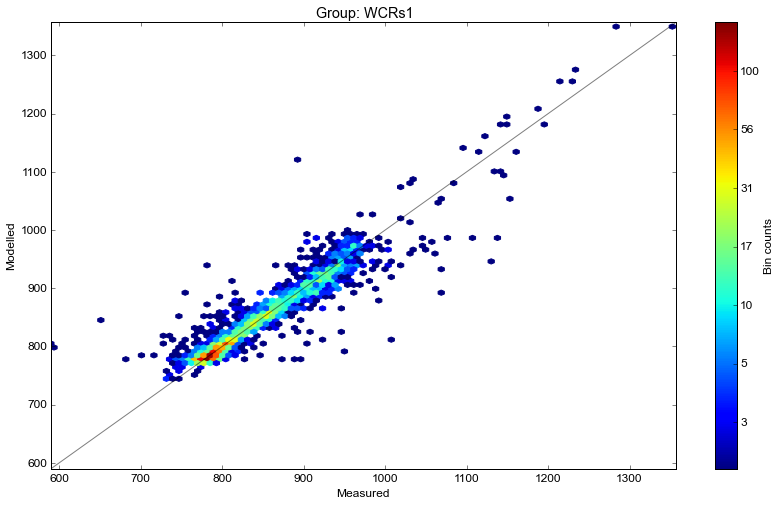

In [22]:
residuals.plot_hexbin(groupinfo=['WCRs1'], title = 'Group: WCRs1')

The Res class can be used alone to read in separate .rei or .res files.  Also, an observation info file can be read in to provide more detailed information such as alternative observation names, spatial coordinates, date and time information, or different classifications of observation types or subgroups.

In [30]:
residual_data = pt.Res('../cc/columbia_svda.rei.16', obs_info_file='../cc/observation_locations.csv')
residual_data.obsinfo

,X,Y,Type,Group
7089222501_b,570954.8275,296365.6586,head,head_best
1089192101_b,575025.8740,304202.1060,head,head_best
2089103101_b,586985.0743,304340.3521,head,head_best
3089103201_b,586962.2041,304370.9770,head,head_best
2089475301_b,536391.8551,305263.7315,head,head_best
...,...,...,...,...
5406328_marshcr,534277.6250,301990.3125,baseflow,headwaters
5405820_wiscons,549497.6250,326316.7500,baseflow,headwaters
ccsg12_beavercr,594915.1659,337949.2778,baseflow,cc_streams
5406060_blum'sc,546281.8750,308812.5938,baseflow,headwaters


Numerous plots can be generated for the residual information.  Different plots for individual observation groups, or composite groups are quickly created.

(<matplotlib.figure.Figure at 0x18d06588>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a40fda0>)

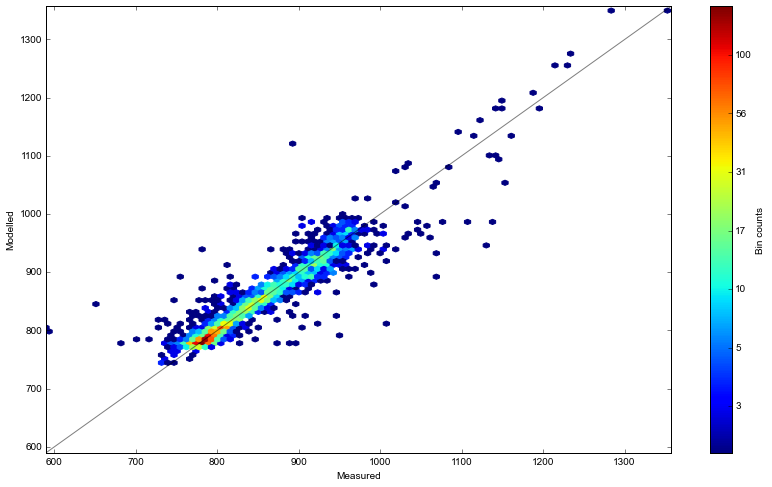

In [31]:
residual_data.plot_hexbin(['WCRs1'])

In [24]:
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize':[12,8]})

(<matplotlib.figure.Figure at 0x1cad2b38>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001CCC3320>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x000000001FBC24E0>]], dtype=object))

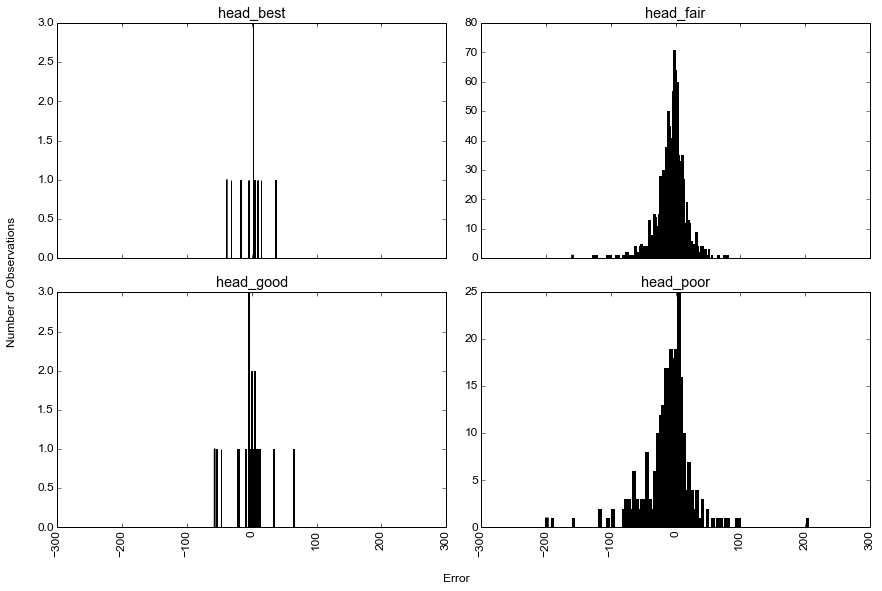

In [25]:
residuals.plot_hist(groupinfo=['head_best', 'head_good', 'head_fair', 'head_poor'], color = 'k')

PESTools uses the data from the Jacobian matrix and weights assigned by PEST to calculate the parameter sensitivity.  Convenently, there is no need to save or read in the parameter sensitivity file generated by PEST.


In [38]:
parsen = pestools.ParSen(r'../cc/Columbia', drop_regul = True)

Parameter sensitivity values can be access from the df attribute (df standing for DataFrame).

In [39]:
parsen.df

,Parameter Group,Sensitivity
kpkpx_tc2,kp,0.000118
kpkpx_tc3,kp,0.000334
...,...,...
sfrc,sfr_cond,0.004233
wr_drnc,sfr_cond,0.000005


In [24]:
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize':[14,14]})

(<matplotlib.figure.Figure at 0x40cac88>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11e58d68>)

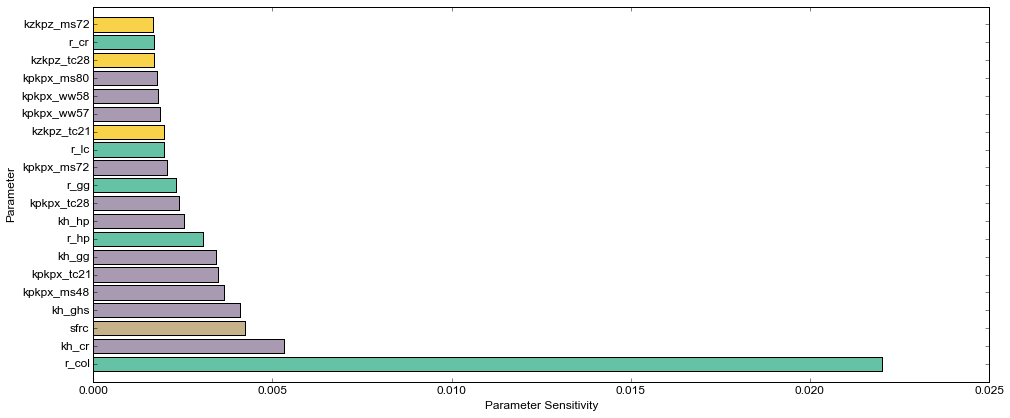

In [3]:
parsen = pestools.ParSen(r'../cc/Columbia', drop_regul = True)
parsen.plot(n=20)

In [7]:
% matplotlib qt

In [8]:
cor = example.cor
cor.plot_heatmap(par_list = ['kpkpx_tc2', 'kpkpx_tc34', 'kpkpx_tc21', 'kv_w', 'wr_drnc', 'kzkpz_tc47', 'kv_lo', 'sfrc', 'r_col'])

(<matplotlib.figure.Figure at 0x11aa99e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x136a04e0>)

<center>**CONCLUSIONS**</center>

In [17]:
x.to_csv('csv.csv')

<center>**REFERENCES**</center>